# Economic Freedom Index

https://www.heritage.org/index/?version=182

https://www.heritage.org/index/explore?view=by-variables&u=637490230282383003

In [47]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.linear_model import Lasso, Ridge, ElasticNet

from sklearn import tree, metrics
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [2]:
economic_freedom = pd.read_csv('econ_freedom_index.csv')
economic_freedom.head()

,Country,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Total Freedom,Total Tax Rate
0,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,7.0,20.0,20.0,5.0,25.6,35.5,$69.60,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3,272.3,47.0
1,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,1.1,23.0,15.0,24.9,29.5,2.9,$36.00,3.9,2.5,"$12,507",13.9,2.0,"1,119.10",71.2,431.3,39.1
2,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,8.8,35.0,23.0,24.5,41.4,41.5,$632.90,2.0,3.1,"$15,237",10.0,5.6,"1,203.00",25.8,313.8,66.8
3,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,9.4,17.0,30.0,20.6,25.3,28.2,$190.30,0.7,2.9,"$6,753",8.2,31.7,"-2,254.50",65.3,301.1,56.4
4,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,33.0,7.5,35.0,30.0,30.8,41.0,44.1,$920.20,2.9,0.7,"$20,876",8.7,25.7,"11,857.00",52.6,348.5,72.5


In [3]:
economic_freedom.columns

Index(['Country', 'Region', 'World Rank', 'Region Rank', '2019 Score',
       'Property Rights', 'Judical Effectiveness', 'Government Integrity',
       'Tax Burden', 'Gov't Spending', 'Fiscal Health', 'Tariff Rate (%)',
       'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Gov't Expenditure % of GDP', 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)', 'Total Freedom', 'Total Tax Rate'],
      dtype='object')

In [10]:
features = ['Property Rights', 'Judical Effectiveness', 'Government Integrity','Tax Burden', "Gov't Spending", 'Fiscal Health', 'Tariff Rate (%)',
       'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       "Gov't Expenditure % of GDP", 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)', 'Total Freedom', 'Total Tax Rate']

X = economic_freedom[features]

y = economic_freedom['2019 Score']

X = pd.get_dummies(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 246)

In [13]:
clf = DecisionTreeRegressor()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_pred = pd.Series(y_pred)

clf

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [35]:
clf.score(X_test, y_test)

0.8556004261594992

In [48]:
r2_score(y_test, y_pred)

0.8556004261594992

<AxesSubplot:xlabel='2019 Score'>

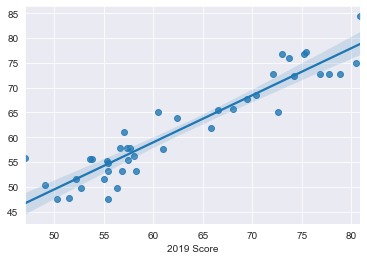

In [52]:
sns.regplot(y_test, y_pred, data=economic_freedom, fit_reg=True)

A lot of the predictions were close to the actual values showing there was a high accuracy rating for the 2019 scores.

In [25]:
from sklearn.linear_model import LinearRegression

lingreg = LinearRegression()

lingreg = lingreg.fit(X, y)

lingreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
features = ['Property Rights', 'Judical Effectiveness', 'Government Integrity','Tax Burden', "Gov't Spending", 'Fiscal Health', 'Tariff Rate (%)',
       'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       "Gov't Expenditure % of GDP", 'Population (Millions)',
       'GDP (Billions, PPP)','5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)', 'Total Freedom', 'Total Tax Rate','2019 Score']

X = economic_freedom[features]

y = economic_freedom['GDP Growth Rate (%)']

X = pd.get_dummies(X)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 246)

In [60]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_pred = pd.Series(y_pred)

clf

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [61]:
clf.score(X_test, y_test)

-0.14346294159832862

In [62]:
r2_score(y_test, y_pred)

-0.14346294159832862

<AxesSubplot:xlabel='GDP Growth Rate (%)'>

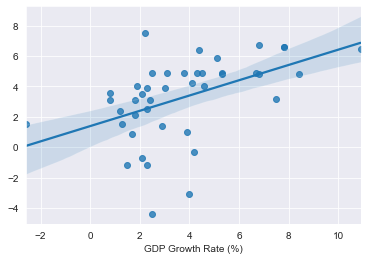

In [63]:
sns.regplot(y_test, y_pred, data=economic_freedom, fit_reg=True)

A lot of the predicted values were close to the actual values while having a fair share of outliers.

In [65]:
lingreg = LinearRegression()

lingreg = lingreg.fit(X, y)

lingreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
features = ['Property Rights', 'Judical Effectiveness', 'Government Integrity','Tax Burden', "Gov't Spending", 'Fiscal Health', 'Tariff Rate (%)',
       'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       "Gov't Expenditure % of GDP", 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)', 'Total Freedom', 'Total Tax Rate','2019 Score','GDP Growth Rate (%)']

X = economic_freedom[features]

y = economic_freedom['5 Year GDP Growth Rate (%)']

X = pd.get_dummies(X)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 246)

In [68]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_pred = pd.Series(y_pred)

clf

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [69]:
clf.score(X_test, y_test)

0.15073628748986745

In [70]:
r2_score(y_test, y_pred)

0.15073628748986745

<AxesSubplot:xlabel='5 Year GDP Growth Rate (%)'>

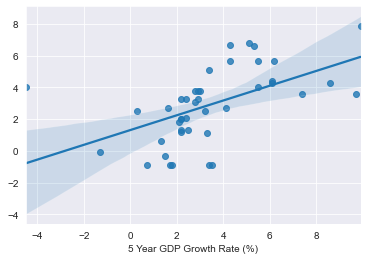

In [71]:
sns.regplot(y_test, y_pred, data=economic_freedom, fit_reg=True)

Roughly half or likely more of the predicted values did not match the actual values for the 5 year GDP Growth Rate which runs opposite to the GDP Growth Rate (%) in the short term.

In [72]:
lingreg = LinearRegression()

lingreg = lingreg.fit(X, y)

lingreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
features = ['Property Rights', 'Judical Effectiveness', 'Government Integrity','Tax Burden', "Gov't Spending",'Tariff Rate (%)',
       'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       "Gov't Expenditure % of GDP", 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)', 'Total Freedom', 'Total Tax Rate','2019 Score','GDP Growth Rate (%)','5 Year GDP Growth Rate (%)']

X = economic_freedom[features]

y = economic_freedom['Fiscal Health']

X = pd.get_dummies(X)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 246)

In [75]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_pred = pd.Series(y_pred)

clf

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [76]:
clf.score(X_test, y_test)

-0.3961765834324722

In [77]:
r2_score(y_test, y_pred)

-0.3961765834324722

<AxesSubplot:xlabel='Fiscal Health'>

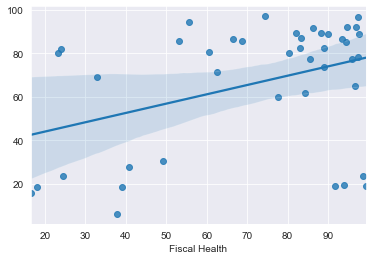

In [78]:
sns.regplot(y_test, y_pred, data=economic_freedom, fit_reg=True)

A lot of the predicted values were not even close to the actual values in determining the Fiscal Health.

In [79]:
lingreg = LinearRegression()

lingreg = lingreg.fit(X, y)

lingreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)